<h1>Préprocessing</h1>

<h3>Lecture du dataset</h3>

Dans un premier temps, nous ouvrons simplement le fichier 'welddb.data', et nous nommons les colonnes selon le fichier .info

In [1]:
import pandas as pd

df = pd.read_csv("./welddb/welddb.data", 
                 sep=r"\s+",      
                 header=None,    
                 na_values="N")  

columns = [
    "C", "Si", "Mn", "S", "P", "Ni", "Cr", "Mo", "V", "Cu", "Co", "W",
    "O", "Ti", "N", "Al", "B", "Nb", "Sn", "As", "Sb",
    "Current", "Voltage", "AC_DC", "Polarity", "Heat_input", "Interpass_temp",
    "Weld_type", "PWHT_temp", "PWHT_time",
    "Yield_strength", "UTS", "Elongation", "RA",
    "Charpy_temp", "Charpy_toughness", "Hardness",
    "FATT50", "Primary_ferrite", "Ferrite_2nd_phase",
    "Acicular_ferrite", "Martensite", "Ferrite_carbide",
    "Weld_ID"
]

df.columns = columns

Nous nous intéressons ensuite à la structure de la base de données, nous utlisons donc les méthodes fournies par pandas pour analyser les différentes colonnes, ainsi que déterminer lesquelles ont le plus de valeurs non renseignées.

In [2]:
df.describe()

,C,Si,Mn,P,Ni,Cr,O,Current,Voltage,Heat_input,...,UTS,Elongation,RA,Charpy_temp,Charpy_toughness,FATT50,Ferrite_2nd_phase,Acicular_ferrite,Martensite,Ferrite_carbide
count,1652.000000,1652.000000,1652.000000,1642.000000,697.000000,784.000000,1256.000000,1404.000000,1404.000000,1652.000000,...,738.000000,700.000000,705.000000,879.000000,879.00000,31.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.012952,0.415034,2.101273,441.967357,283.843661,27.607379,1.700987,...,594.386314,26.275714,71.799858,-34.606371,87.68942,-31.096774,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.019627,0.786951,3.026548,147.483825,192.560955,12.555629,1.298465,...,88.636238,4.895986,8.926551,34.738624,50.11670,43.644285,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.002000,0.000000,0.000000,132.000000,115.000000,11.500000,0.600000,...,447.000000,10.600000,17.000000,-114.000000,3.00000,-126.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.007000,0.000000,0.000000,370.000000,170.000000,21.000000,1.000000,...,532.775000,22.800000,68.000000,-60.000000,38.00000,-62.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.010000,0.067000,0.530000,423.000000,170.000000,21.000000,1.000000,...,575.500000,26.800000,75.000000,-40.000000,100.00000,-15.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.014000,0.260000,2.300000,471.000000,300.000000,30.000000,2.000000,...,647.000000,30.000000,78.000000,-17.500000,100.00000,5.000000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.250000,3.500000,10.200000,1650.000000,900.000000,75.360000,7.900000,...,1151.000000,37.000000,83.000000,188.000000,270.00000,30.000000,100.000000,88.000000,30.000000,8.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C                  1652 non-null   float64
 1   Si                 1652 non-null   float64
 2   Mn                 1652 non-null   float64
 3   S                  1648 non-null   object 
 4   P                  1642 non-null   float64
 5   Ni                 697 non-null    float64
 6   Cr                 784 non-null    float64
 7   Mo                 793 non-null    object 
 8   V                  928 non-null    object 
 9   Cu                 578 non-null    object 
 10  Co                 129 non-null    object 
 11  W                  75 non-null     object 
 12  O                  1256 non-null   float64
 13  Ti                 935 non-null    object 
 14  N                  1242 non-null   object 
 15  Al                 905 non-null    object 
 16  B                  504 n

In [4]:
(df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100

FATT50               98.123487
W                    95.460048
Ferrite_carbide      94.612591
Martensite           94.612591
Ferrite_2nd_phase    94.552058
Acicular_ferrite     94.552058
Primary_ferrite      94.067797
Co                   92.191283
Hardness             91.646489
As                   85.835351
Sb                   84.261501
Sn                   82.082324
B                    69.491525
Cu                   65.012107
Ni                   57.808717
Elongation           57.627119
RA                   57.324455
UTS                  55.326877
Nb                   54.479419
Yield_strength       52.784504
Cr                   52.542373
Mo                   51.997579
Charpy_toughness     46.791768
Charpy_temp          46.791768
Al                   45.217918
V                    43.825666
Ti                   43.401937
N                    24.818402
O                    23.970944
Voltage              15.012107
Current              15.012107
AC_DC                13.014528
Polarity

<h3>Nettoyage des données</h3>

Dans un second temps, nous nettoyons les données pour supprimer les valeurs non numériques dans les colonnes censées l'être.

In [ ]:
import re
import numpy as np

def nettoyer_valeur(val):
    val = str(val).strip()

    # Cas 'N' ou vide
    if val.upper() == "N" or val == "":
        return np.nan

    # Cas '<5' -> remplacer par 5 (ou NaN si vous préférez)
    if val.startswith("<"):
        try:
            return float(val[1:])
        except:
            return np.nan

    # Cas '67tot33res' -> extraire ce qu'il y a avant 'tot'
    match = re.match(r"(\d+)", val)
    if match:
        return float(match.group(1))

    return np.nan

colonnes_a_nettoyer = [
    'C', 'Si', 'Mn', 'S', 'P', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 
    'Co', 'W', 'O', 'Ti', 'N', 'Al', 'B', 'Nb', 'Sn', 'As', 'Sb', 'Primary_ferrite'
]

# On applique la fonction seulement sur les colonnes ciblées
df[colonnes_a_nettoyer] = df[colonnes_a_nettoyer].applymap(nettoyer_valeur)

/var/folders/qc/5qn44xzs143g6s6sy04v51qm0000gn/T/ipykernel_39862/3993039898.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[colonnes_a_nettoyer] = df[colonnes_a_nettoyer].applymap(nettoyer_valeur)


In [6]:
df['Interpass_temp'] = df['Interpass_temp'].replace("150-200", 175)
df['Interpass_temp'] = pd.to_numeric(df['Interpass_temp'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C                  1652 non-null   float64
 1   Si                 1652 non-null   float64
 2   Mn                 1652 non-null   float64
 3   S                  1648 non-null   float64
 4   P                  1642 non-null   float64
 5   Ni                 697 non-null    float64
 6   Cr                 784 non-null    float64
 7   Mo                 793 non-null    float64
 8   V                  928 non-null    float64
 9   Cu                 578 non-null    float64
 10  Co                 129 non-null    float64
 11  W                  75 non-null     float64
 12  O                  1256 non-null   float64
 13  Ti                 935 non-null    float64
 14  N                  1242 non-null   float64
 15  Al                 905 non-null    float64
 16  B                  504 n

In [7]:
df["Hardness"] = df["Hardness"].astype(str).str.extract(r"^(\d+\.?\d*)").astype(float)
df['Hardness'] = pd.to_numeric(df['Hardness'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C                  1652 non-null   float64
 1   Si                 1652 non-null   float64
 2   Mn                 1652 non-null   float64
 3   S                  1648 non-null   float64
 4   P                  1642 non-null   float64
 5   Ni                 697 non-null    float64
 6   Cr                 784 non-null    float64
 7   Mo                 793 non-null    float64
 8   V                  928 non-null    float64
 9   Cu                 578 non-null    float64
 10  Co                 129 non-null    float64
 11  W                  75 non-null     float64
 12  O                  1256 non-null   float64
 13  Ti                 935 non-null    float64
 14  N                  1242 non-null   float64
 15  Al                 905 non-null    float64
 16  B                  504 n

On observe que toutes les colonnes devant contenir des valeurs numériques sont bien au format numérique. Nous allons maintenant nous ocuper des variables catégorielles.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C                  1652 non-null   float64
 1   Si                 1652 non-null   float64
 2   Mn                 1652 non-null   float64
 3   S                  1648 non-null   float64
 4   P                  1642 non-null   float64
 5   Ni                 697 non-null    float64
 6   Cr                 784 non-null    float64
 7   Mo                 793 non-null    float64
 8   V                  928 non-null    float64
 9   Cu                 578 non-null    float64
 10  Co                 129 non-null    float64
 11  W                  75 non-null     float64
 12  O                  1256 non-null   float64
 13  Ti                 935 non-null    float64
 14  N                  1242 non-null   float64
 15  Al                 905 non-null    float64
 16  B                  504 n

In [10]:
df = df.drop('Weld_ID', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C                  1652 non-null   float64
 1   Si                 1652 non-null   float64
 2   Mn                 1652 non-null   float64
 3   S                  1648 non-null   float64
 4   P                  1642 non-null   float64
 5   Ni                 697 non-null    float64
 6   Cr                 784 non-null    float64
 7   Mo                 793 non-null    float64
 8   V                  928 non-null    float64
 9   Cu                 578 non-null    float64
 10  Co                 129 non-null    float64
 11  W                  75 non-null     float64
 12  O                  1256 non-null   float64
 13  Ti                 935 non-null    float64
 14  N                  1242 non-null   float64
 15  Al                 905 non-null    float64
 16  B                  504 n

<h3>Colonnes à supprimer</h3>

Nous allons maintenant nou intéresser aux features que nous pouvons supprimer de notre dataset sans perdre trop d'information. Pour ce faire, nous allons étudier la corrélation entre les variables, et supprimer celles pour lesquelles les données sont largement absentes, tout en ayant très peu de corrélation avec les variables d'intérêt pour qualifier la qualité d'une soudure. D'après le papier scientifique fourni avec le dataset, les trois features les plus intéressantes pour qualifier la qualité 'une soudure sont les suivantes : 
    <li>Charpy Toughness</li>
    <li>Elongation</li>
    <li>Ultimate tensile strength</li>

In [12]:
miss = df.isna().mean().sort_values(ascending=False)
miss_df = miss.to_frame(name="missing_ratio").reset_index().rename(columns={"index": "column"})

In [13]:
import plotly.express as px

target_vars = ["Charpy_toughness", "Elongation", "UTS", "Yield_strength"]

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corrs = df[num_cols].corr(method='pearson')[target_vars]

# Tri des corrélations en fonction de la quantité de missing values
corrs_sorted = corrs.reindex(miss_df['column'])


print("=== Corrélation absolue avec les variables de qualité ===")
print(corrs_sorted.round(3))
fig = px.imshow(
    corrs_sorted,
    aspect="auto",
    color_continuous_scale="RdBu_r",
    title="Correlation absolue entre les variables numériques et les variables de qualité"
)
fig.show()

=== Corrélation absolue avec les variables de qualité ===
                   Charpy_toughness  Elongation    UTS  Yield_strength
column                                                                
FATT50                          NaN      -0.321 -0.547          -0.332
W                               NaN      -0.309  0.186           0.082
Ferrite_carbide                 NaN         NaN    NaN             NaN
Martensite                      NaN         NaN    NaN             NaN
Acicular_ferrite                NaN         NaN    NaN             NaN
Ferrite_2nd_phase               NaN         NaN    NaN             NaN
Primary_ferrite                 NaN         NaN    NaN             NaN
Co                              NaN      -0.124  0.105          -0.002
Hardness                        NaN      -0.671  0.864           0.812
As                           -0.051       0.096 -0.136           0.029
Sb                            0.065       0.077 -0.318          -0.244
Sn                 

Suite à cette étude, nous élimonons les colonnes suivantes :

In [14]:
COLS_TO_DROP = ["FATT50", "W", "Ferrite_carbide", "Martensite", "Ferrite_2nd_phase", "Acicular_ferrite", 
                "Primary_ferrite", "Co", "Hardness", "As", "Sb", "Sn", "B", "Cu"]
df = df.drop(columns=COLS_TO_DROP)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C                 1652 non-null   float64
 1   Si                1652 non-null   float64
 2   Mn                1652 non-null   float64
 3   S                 1648 non-null   float64
 4   P                 1642 non-null   float64
 5   Ni                697 non-null    float64
 6   Cr                784 non-null    float64
 7   Mo                793 non-null    float64
 8   V                 928 non-null    float64
 9   O                 1256 non-null   float64
 10  Ti                935 non-null    float64
 11  N                 1242 non-null   float64
 12  Al                905 non-null    float64
 13  Nb                752 non-null    float64
 14  Current           1404 non-null   float64
 15  Voltage           1404 non-null   float64
 16  AC_DC             1437 non-null   object 


D'après le même papier scientifique, nous pouvons aussi remplacer les valeurs vides de certaines colonnes par 0.

Ensuite, pour remplir les autres colonnes, nous utilisons un KNNImputer de la bibliothèque sklearn, de sorte à peupler notre dataset avec des valeurs potentiellement plus proches de la réalité que par des transformation utilisant la médiane ou la moyenne de l'ensemble du dataset.

Pour être en mesure d'évaluer la qualité de notre modèle, nous séparons tout de suite le dataset en 2 (un set pour le train et un set pour le test). Ainsi, nous remplirons uniquement les valeurs manquantes pour le dataset de train à l'aide d'un KNN.

In [16]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,random_state=42,train_size=0.8)

print(df_test.shape)
print(df_train.shape)

df_train.info()

(331, 29)
(1321, 29)
<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 306 to 1126
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C                 1321 non-null   float64
 1   Si                1321 non-null   float64
 2   Mn                1321 non-null   float64
 3   S                 1317 non-null   float64
 4   P                 1313 non-null   float64
 5   Ni                570 non-null    float64
 6   Cr                633 non-null    float64
 7   Mo                643 non-null    float64
 8   V                 745 non-null    float64
 9   O                 1009 non-null   float64
 10  Ti                737 non-null    float64
 11  N                 1003 non-null   float64
 12  Al                726 non-null    float64
 13  Nb                602 non-null    float64
 14  Current           1115 non-null   float64
 15  Voltage           1115 non-null   float64
 16  AC_DC             1138 n

In [17]:
impurity_elements = ["P", "S"]
deliberate_elements = ["Mn", "Ni", "Cr", "Mo"]

for col in impurity_elements + deliberate_elements:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

# Add indicators
for col in impurity_elements + deliberate_elements:
    df_train[f"{col}_was_na"] = df_train[col].isna().astype(int)

# Apply domain-specific fills
for col in impurity_elements:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
for col in deliberate_elements:
    df_train[col] = df_train[col].fillna(0)

In [18]:
#uts before imputation :
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

print("Nombre total de valeurs manquantes avant traitement :", df_train.isna().sum().sum())

px.histogram(df_train, x="Ti", nbins=30, title="Ti before imputation").show()

# Colonnes à exclure du traitement
excluded_cols = ["Charpy_toughness", "Elongation", "UTS"]

# Séparation des colonnes numériques et catégorielles
num_cols = df_train.select_dtypes(include=[np.number]).columns
cat_cols = df_train.select_dtypes(exclude=[np.number]).columns

# Colonnes numériques sur lesquelles appliquer le KNNImputer
num_cols_to_impute = [col for col in num_cols if col not in excluded_cols]

# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

# Application du pipeline uniquement sur les colonnes sélectionnées
df_train[num_cols_to_impute] = pipeline.fit_transform(df_train[num_cols_to_impute])

# Remplissage des valeurs manquantes pour les variables catégorielles
for col in cat_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

print(cat_cols)
print(df_train.info())
# Vérification finale du nombre de valeurs manquantes restantes
print("Nombre total de valeurs manquantes après traitement :", df_train.isna().sum().sum())
px.histogram(df_train, x="Ti", nbins=30, title="Ti after imputation").show()

Nombre total de valeurs manquantes avant traitement : 8044


Index(['AC_DC', 'Polarity', 'Weld_type'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 306 to 1126
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C                 1321 non-null   float64
 1   Si                1321 non-null   float64
 2   Mn                1321 non-null   float64
 3   S                 1321 non-null   float64
 4   P                 1321 non-null   float64
 5   Ni                1321 non-null   float64
 6   Cr                1321 non-null   float64
 7   Mo                1321 non-null   float64
 8   V                 1321 non-null   float64
 9   O                 1321 non-null   float64
 10  Ti                1321 non-null   float64
 11  N                 1321 non-null   float64
 12  Al                1321 non-null   float64
 13  Nb                1321 non-null   float64
 14  Current           1321 non-null   float64
 15  Voltage           1321 non-null   

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 306 to 1126
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C                 1321 non-null   float64
 1   Si                1321 non-null   float64
 2   Mn                1321 non-null   float64
 3   S                 1321 non-null   float64
 4   P                 1321 non-null   float64
 5   Ni                1321 non-null   float64
 6   Cr                1321 non-null   float64
 7   Mo                1321 non-null   float64
 8   V                 1321 non-null   float64
 9   O                 1321 non-null   float64
 10  Ti                1321 non-null   float64
 11  N                 1321 non-null   float64
 12  Al                1321 non-null   float64
 13  Nb                1321 non-null   float64
 14  Current           1321 non-null   float64
 15  Voltage           1321 non-null   float64
 16  AC_DC             1321 non-null   object 
 17

In [20]:
#convert AC/DC to 1/0
df_train['AC_DC'] = df_train['AC_DC'].map({'AC': 1, 'DC': 0})

dummy_cols = [c for c in df_train.columns if c.startswith('Polarity_') or c.startswith('Weld_type_')]
df_train[dummy_cols] = df_train[dummy_cols].astype(int)

<h3>PCA</h3>

Nous réalisons ensuite une PCA pour faire apparaitre quelles sont les features les plus intéressantes pour qualifier la qualité d'une soudure, en excluant les 3 colonnes citées précédemment.

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 306 to 1126
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   C                 1321 non-null   float64
 1   Si                1321 non-null   float64
 2   Mn                1321 non-null   float64
 3   S                 1321 non-null   float64
 4   P                 1321 non-null   float64
 5   Ni                1321 non-null   float64
 6   Cr                1321 non-null   float64
 7   Mo                1321 non-null   float64
 8   V                 1321 non-null   float64
 9   O                 1321 non-null   float64
 10  Ti                1321 non-null   float64
 11  N                 1321 non-null   float64
 12  Al                1321 non-null   float64
 13  Nb                1321 non-null   float64
 14  Current           1321 non-null   float64
 15  Voltage           1321 non-null   float64
 16  AC_DC             1321 non-null   int64  
 17

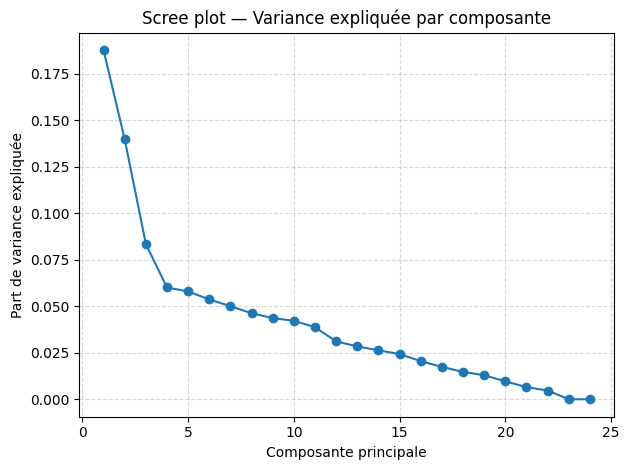

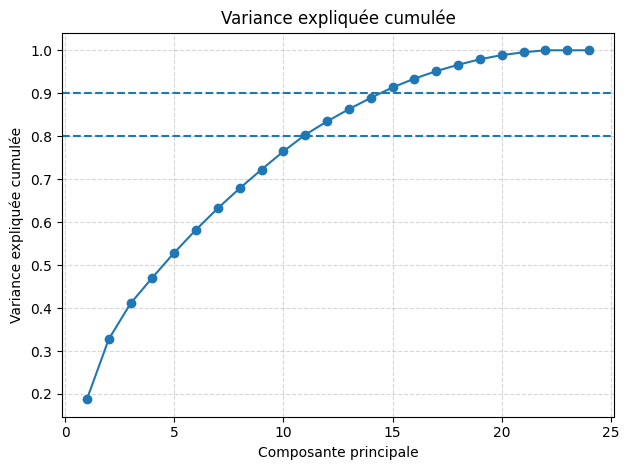

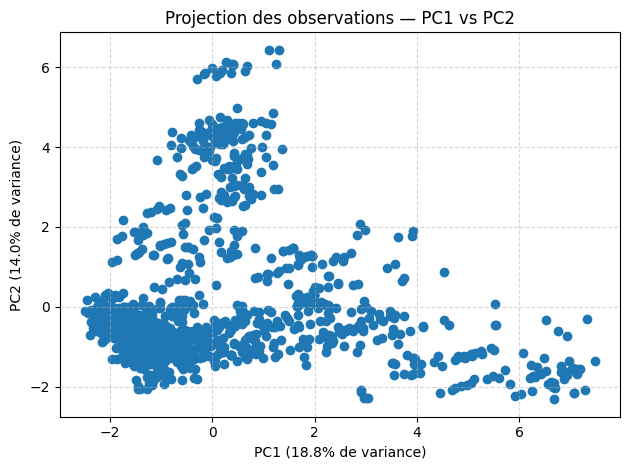

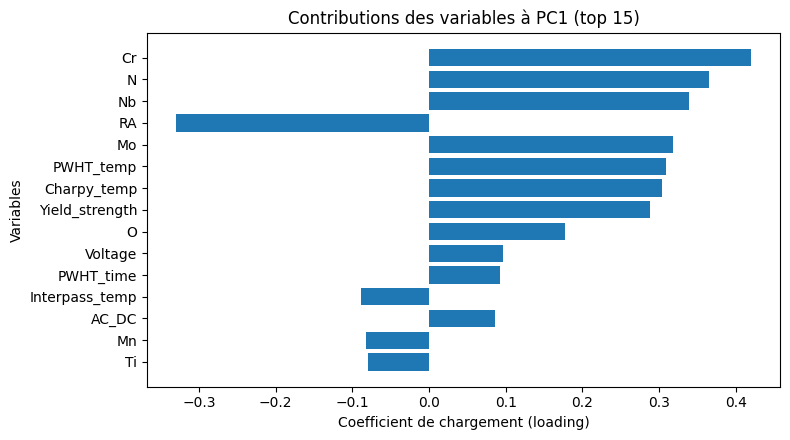

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------
# 0) Paramètres utilisateur
# -------------------------
excluded_cols = ["Charpy_toughness", "Elongation", "UTS", "P_was_na", "S_was_na", "Mn_was_na", "Ni_was_na", "Cr_was_na", "Mo_was_na", "Weld_type_FCA",
                 "Weld_type_GMAA", "Weld_type_GTAA", "Weld_type_MMA", "Weld_type_NGGMA", "Weld_type_NGSAW", "Weld_type_SA", "Weld_type_SAA", 
                 "Weld_type_ShMA", "Weld_type_TSA", "Polarity_0", "Polarity_+", "Polarity_-"]
label_col = None  # (optionnel) nom d'une colonne à afficher comme étiquette sur le scatter PC1–PC2 (ex: "AlloyID")
n_top_loadings = 15  # nombre de variables les plus contributrices à afficher

# -------------------------
# 1) Préparation des données
# -------------------------
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
pca_features = [c for c in num_cols if c not in excluded_cols]


# Standardisation
scaler = StandardScaler()  ## attention on a deja scale
X_scaled = scaler.fit_transform(df_train[pca_features])

# -------------------------
# 2) PCA
# -------------------------
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Noms des composantes et DataFrames utiles
pc_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_scores = pd.DataFrame(X_pca, columns=pc_names, index=df_train.index)
loadings = pd.DataFrame(pca.components_.T, index=pca_features, columns=pc_names)

# -------------------------
# 3) Graphiques
# -------------------------

# (A) Scree plot — variance expliquée par composante
plt.figure()
plt.plot(range(1, len(explained) + 1), explained, marker='o')
plt.title("Scree plot — Variance expliquée par composante")
plt.xlabel("Composante principale")
plt.ylabel("Part de variance expliquée")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (B) Variance expliquée cumulée
plt.figure()
plt.plot(range(1, len(cum_explained) + 1), cum_explained, marker='o')
plt.title("Variance expliquée cumulée")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée cumulée")
plt.axhline(0.80, linestyle='--')  # repère 80%
plt.axhline(0.90, linestyle='--')  # repère 90%
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (C) Nuage de points PC1 vs PC2
plt.figure()
plt.scatter(df_scores["PC1"], df_scores["PC2"])
plt.title("Projection des observations — PC1 vs PC2")
plt.xlabel(f"PC1 ({explained[0]*100:.1f}% de variance)")
plt.ylabel(f"PC2 ({explained[1]*100:.1f}% de variance)")
plt.grid(True, linestyle='--', alpha=0.5)



plt.tight_layout()
plt.show()

# (D) Contributions (loadings) — variables les plus importantes sur PC1
# On affiche les |coefficients| les plus élevés de PC1
pc1_load = loadings["PC1"].abs().sort_values(ascending=False).head(n_top_loadings)
vars_to_plot = pc1_load.index.tolist()

plt.figure(figsize=(8, max(4, 0.3*len(vars_to_plot))))
plt.barh(vars_to_plot[::-1], loadings.loc[vars_to_plot, "PC1"][::-1])
plt.title(f"Contributions des variables à PC1 (top {len(vars_to_plot)})")
plt.xlabel("Coefficient de chargement (loading)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# -------------------------
# 4) (Option) Export des résultats
# -------------------------
# df_scores.to_csv("pca_scores.csv", index=False)
# loadings.to_csv("pca_loadings.csv")

